In [7]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px

#### Amdahl law
pg. 10

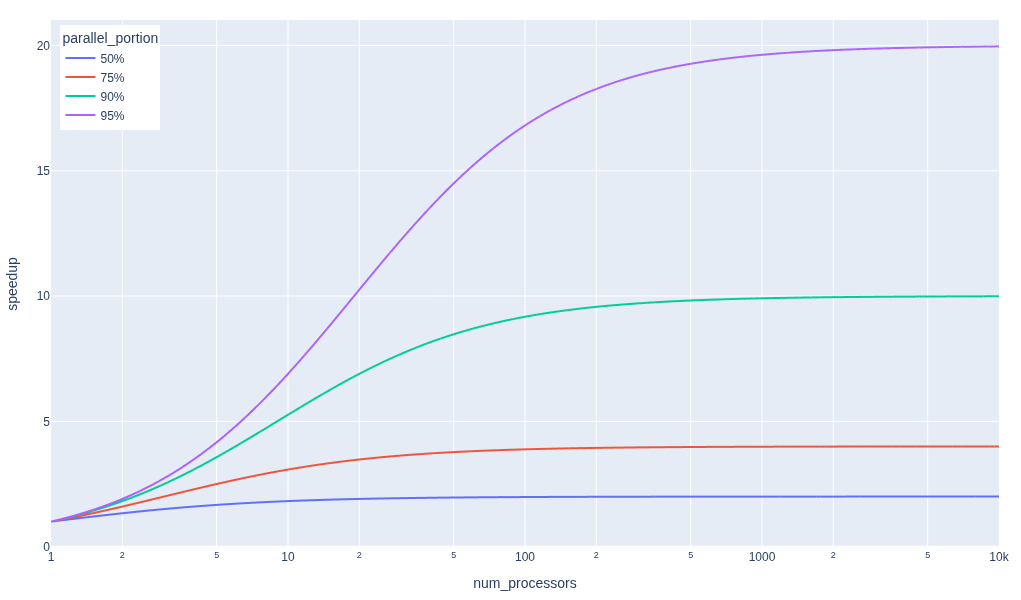

In [12]:
# Amdahl law
def amdahl(t, s):
    return 1 / ((1 - t) + t / s)

# data
df_dict = {
    "num_processors": np.logspace(0, 4, int(1e5)),
}

parallelizable_percentage = np.array([50, 75, 90, 95])

# compute each curve for its parallelizable p
for t in parallelizable_percentage:
    df_dict[f"speedup_{t}"] = amdahl(t / 100, df_dict["num_processors"])

# convert dataframe for plotly.express
df = pd.melt(
    pd.DataFrame(df_dict), 
    id_vars=["num_processors"],
    value_vars=["speedup_50", "speedup_75", "speedup_90", "speedup_95"],
    var_name="parallel_portion",
    value_name="speedup"
)

# Reorder columns to match your desired output
df["parallel_portion"] = df["parallel_portion"].str.extract(r"(\d+)")[0] + "%"
df = df[["num_processors", "speedup", "parallel_portion"]]

# plot
fig = px.line(df, x="num_processors", y="speedup", color="parallel_portion", log_x=True)
fig.update_xaxes(range=[0,4])
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01),
    margin=dict(l=20, r=20, t=20, b=20),
)
fig.show()